K-Means Clustering
---

## PART 1

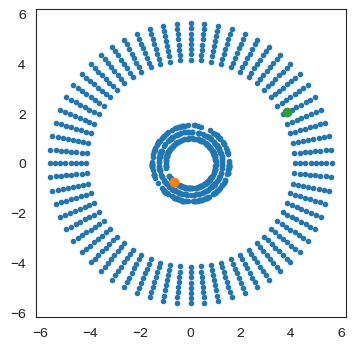

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme('notebook')
sns.set_style('white')

data = pd.read_csv('./data/kmeans_data.txt', header=None, sep='  ', engine='python')

plt.figure(figsize=(4,4))
plt.scatter(data[0], data[1], marker='.')
plt.scatter(data[0][0], data[1][0], marker='o')
plt.scatter(data[0][1], data[1][1], marker='o')

Let's transform the data using a radial function and then apply kmeans clustering.

##### Pseudo-code
1. For all the points (x, y)
   1. Calculate angle using $\theta = tan^{-1}\left( \frac{y}{x} \right)$
   2. Calculate radius as $r = \frac{x}{cos(\theta)}$
2. Plot the radius values using a `kdeplot`

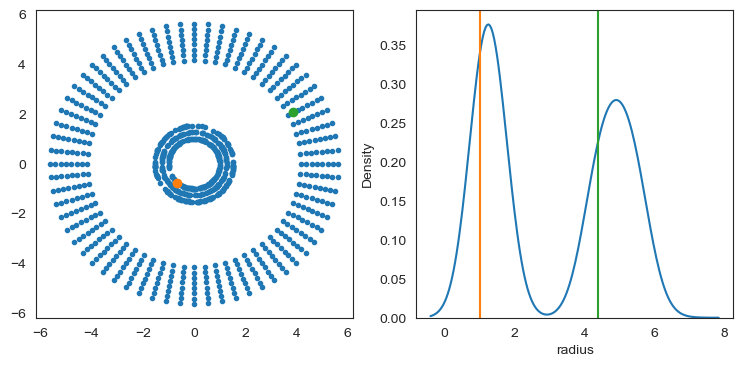

In [2]:
import math
def get_angle(data):
    angles = []
    radii = []
    for idx, value in data.iterrows():
        x = value[0]
        y = value[1]
        angle = math.atan2(y,x)
        angles.append(angle)
        radius = x/math.cos(angle)
        radii.append(radius)
    return angles,radii
        

angles, radii = get_angle(data)
data['radius'] = radii
data['angle'] = angles

fig, ax = plt.subplots(1, 2, figsize=(9,4))
ax[0].scatter(data[0], data[1], marker='.')
ax[0].scatter(data[0][0], data[1][0], marker='o')
ax[0].scatter(data[0][1], data[1][1], marker='o')
sns.kdeplot(data, x='radius', ax=ax[1])
ax[1].axvline(x = data['radius'][0], color=sns.color_palette()[1])
ax[1].axvline(x = data['radius'][1], color=sns.color_palette()[2])

In [3]:
# K-means
def k_means(data):
    data['cluster'] = 0
    assignments = []
    cluster_means = np.array([data.iloc[0]['radius'], data.iloc[1]['radius']])
    cluster_points = np.array([1,1])
    
    def distance(point, mean):
        return np.abs(point - mean)
    def min_distance_cluster(point):
        return np.argmin((distance(point, cluster_means[0]), distance(point, cluster_means[1])))
    
    for idx, row in data.iterrows():
        point = row['radius']
        assigned = min_distance_cluster(point)
        assignments.append(assigned)
        cluster_means[assigned] = ((cluster_points[assigned]*cluster_means[assigned])+(point))/(cluster_points[assigned]+1)
        cluster_points[assigned] += 1
        row['cluster'] = assigned
    data['cluster'] = assignments
    return cluster_means

cluster_means = k_means(data)
cluster_means


array([1.24963407, 4.90568298])

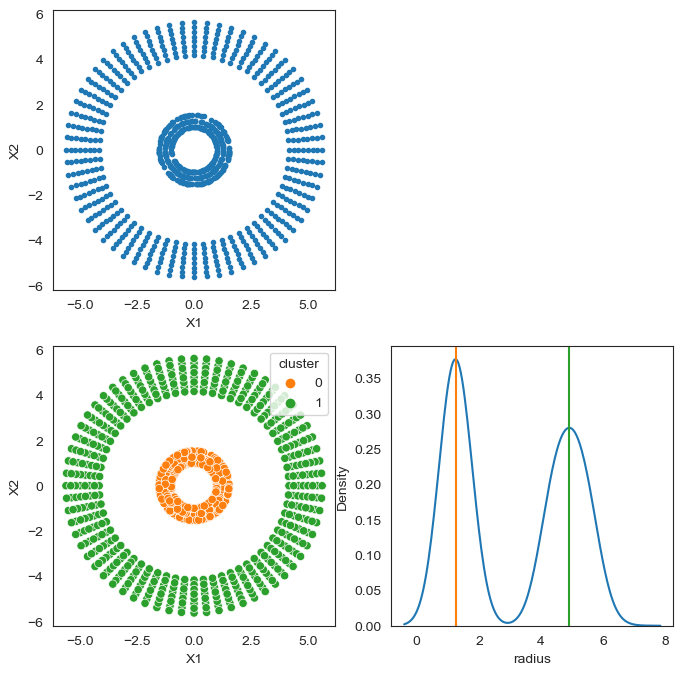

In [4]:
plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.scatter(data[0], data[1], marker='.')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2,2,3)
sns.scatterplot(data, x=0, y=1, hue='cluster', palette=sns.color_palette()[1:3])
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2,2,4)
sns.kdeplot(data, x='radius')
plt.axvline(x = cluster_means[0], color=sns.color_palette()[1])
plt.axvline(x = cluster_means[1], color=sns.color_palette()[2])

## PART 2

In [5]:
# K-means
GAMMA = 0.1
def k_means(data):
    data['cluster'] = 0
    assignments = []
    cluster_means = np.array([data.iloc[0][[0, 1]], data.iloc[1][[0, 1]]])
    cluster_points = np.array([1,1])
    
    def kernelize(p1, p2, gamma=GAMMA):
        return np.exp(-gamma*np.sum(np.square(p1-p2), axis=0))
    def distance(point, mean):
        return kernelize(point, point) + kernelize(mean, mean) -2.0*kernelize(point, mean)
    def min_distance_cluster(point):
        return np.argmin((distance(point, cluster_means[0]), distance(point, cluster_means[1])))
    
    for idx, row in data.iterrows():
        point = row[[0, 1]]
        assigned = min_distance_cluster(point)
        assignments.append(assigned)
        cluster_means[assigned] = ((cluster_points[assigned]*cluster_means[assigned])+(point))/(cluster_points[assigned]+1)
        cluster_points[assigned] += 1
        row['cluster'] = assigned
    data['cluster'] = assignments
    return cluster_means

k_means(data)

array([[-1.25249643, -0.26767434],
       [ 2.77324427,  0.43161584]])

Text(0, 0.5, 'X2')

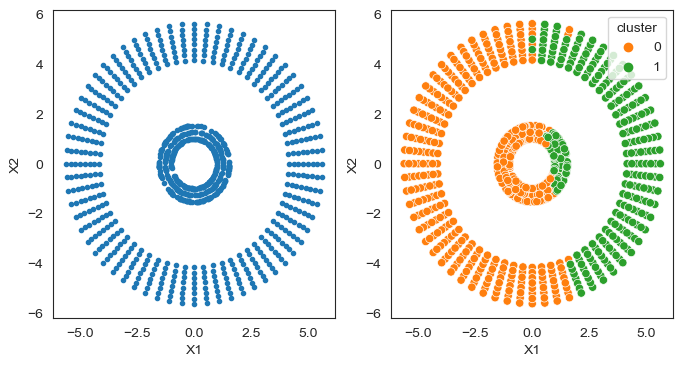

In [6]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.scatter(data[0], data[1], marker='.')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(1,2,2)
sns.scatterplot(data, x=0, y=1, hue='cluster', palette=sns.color_palette()[1:3])
plt.xlabel('X1')
plt.ylabel('X2')